# Persistencia Homológica

In [6]:
# Importar librerías requeridas
import numpy as np
from ripser import ripser
import matplotlib.pyplot as plt
import pandas as pd

from persim import plot_diagrams

from sklearn import datasets
from persim import plot_diagrams
import gudhi

In [7]:
import warnings

# Apagar warnings
warnings.filterwarnings("ignore")

# Base de datos

https://www.kaggle.com/datasets/insiyeah/musicfeatures?select=data.csv

La base de datos es sobre carácteristicas de diferentes canciones. Ésta consta de 30 columnas las cuales 28 son características numéricas, 1 es el nombre del archivo de audio y la última es el género musical. Está última variable puede tomar 10 valores diferentes (blues, classical, country, disco, etc.).

La base de datos consta de 1000 ejemplos, y en cada uno de los 10 géneros hay 100 ejemplos.

Por último, esta base de datos no tiene valores faltantes en ninguna de las columnas.

In [8]:
# Lectura e introducción de la base de datos
csv_file = "data_musical_features.csv"

df = pd.read_csv(csv_file)
# Quitar columnas 'filename' and 'label'
columns_to_drop = ['filename', 'label']
columns_to_drop2 = ["mfcc" + str(i) for i in range(1, 21)]

datos = df.drop(columns=columns_to_drop)
datos = datos.drop(columns = columns_to_drop2)

In [9]:
random_sample = datos.sample(n=100, random_state=22)


In [10]:
random_sample

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
866,123.046875,60,0.371866,0.091189,2631.743802,2827.773301,5699.682201,0.112010
191,123.046875,52,0.274434,0.021447,876.875613,1108.440322,1457.207855,0.051047
732,107.666016,54,0.473438,0.227166,3271.287004,2989.795399,6883.425044,0.145359
657,151.999081,73,0.455741,0.266099,1443.678582,1726.412512,3286.321795,0.046570
155,89.102909,32,0.198926,0.012563,1118.108795,1944.796302,1873.613671,0.042299
...,...,...,...,...,...,...,...,...
510,129.199219,64,0.258985,0.172754,1578.937359,1853.417293,2967.148725,0.088247
920,117.453835,58,0.368647,0.104369,2606.248738,2318.698211,5339.309381,0.149681
353,117.453835,56,0.445757,0.142339,2296.953538,2565.714203,4887.903777,0.096335
468,107.666016,53,0.424750,0.110878,1752.161419,1811.556742,3489.162235,0.083126


In [11]:
random_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 866 to 795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               100 non-null    float64
 1   beats               100 non-null    int64  
 2   chroma_stft         100 non-null    float64
 3   rmse                100 non-null    float64
 4   spectral_centroid   100 non-null    float64
 5   spectral_bandwidth  100 non-null    float64
 6   rolloff             100 non-null    float64
 7   zero_crossing_rate  100 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.0 KB



# Diagramas de Persistencia Homológica

In [12]:
# Calcular el diagrama de persistencia
resultado = ripser(random_sample, metric='euclidean', maxdim=3)

# Obtener el diagrama de persistencia
diagrama_h1 = resultado['dgms'][1]  # 1 para obtener el diagrama H1, puedes cambiar a 0 para H0
diagrama_h0 = resultado['dgms'][0]  


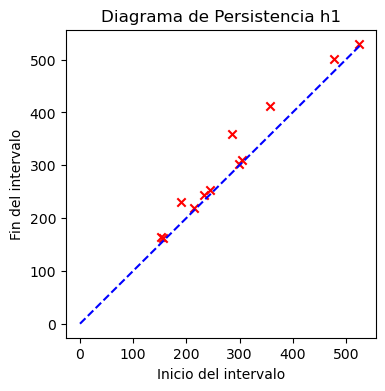

In [13]:
# Muestra el diagrama de persistencia para h1 (loops)
plt.figure(figsize=(4, 4))
plt.scatter(diagrama_h1[:, 0], diagrama_h1[:, 1], c='red', marker='x')
plt.plot([0, max(diagrama_h1[:, 1])], [0, max(diagrama_h1[:, 1])], linestyle='--', color='blue')
plt.title('Diagrama de Persistencia h1')
plt.xlabel('Inicio del intervalo')
plt.ylabel('Fin del intervalo')
plt.show()

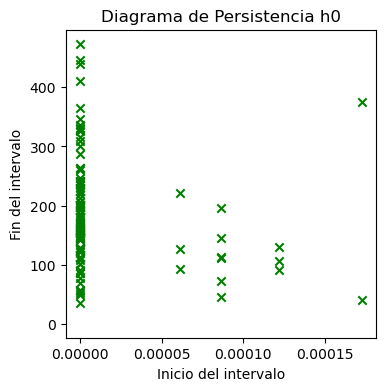

In [14]:
# Muestra el diagrama de persistencia para h0 (componentes conexas)
plt.figure(figsize=(4, 4))
plt.scatter(diagrama_h0[:, 0], diagrama_h0[:, 1], c='green', marker='x')
plt.plot([0, max(diagrama_h0[:, 1])], [0, max(diagrama_h0[:, 1])], linestyle='--', color='blue')
plt.title('Diagrama de Persistencia h0')
plt.xlabel('Inicio del intervalo')
plt.ylabel('Fin del intervalo')
plt.show()

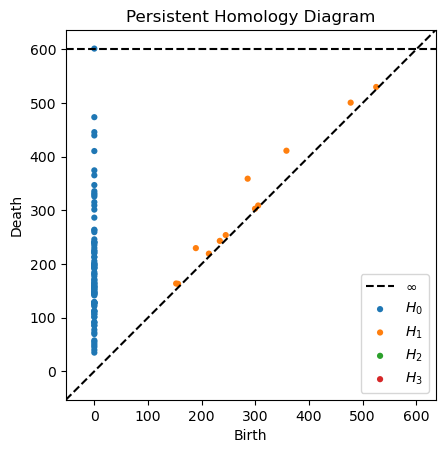

In [15]:
# Graficar el diagrama de persistencia
plot_diagrams(resultado['dgms'])
plt.title('Persistent Homology Diagram')
plt.show()

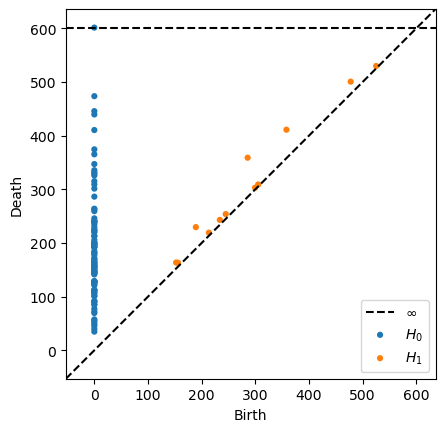

In [16]:
diagrams = ripser(random_sample)['dgms']
plot_diagrams(diagrams, show=True)

In [18]:
random_sample

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
866,123.046875,60,0.371866,0.091189,2631.743802,2827.773301,5699.682201,0.112010
191,123.046875,52,0.274434,0.021447,876.875613,1108.440322,1457.207855,0.051047
732,107.666016,54,0.473438,0.227166,3271.287004,2989.795399,6883.425044,0.145359
657,151.999081,73,0.455741,0.266099,1443.678582,1726.412512,3286.321795,0.046570
155,89.102909,32,0.198926,0.012563,1118.108795,1944.796302,1873.613671,0.042299
...,...,...,...,...,...,...,...,...
510,129.199219,64,0.258985,0.172754,1578.937359,1853.417293,2967.148725,0.088247
920,117.453835,58,0.368647,0.104369,2606.248738,2318.698211,5339.309381,0.149681
353,117.453835,56,0.445757,0.142339,2296.953538,2565.714203,4887.903777,0.096335
468,107.666016,53,0.424750,0.110878,1752.161419,1811.556742,3489.162235,0.083126


usetex mode requires TeX.


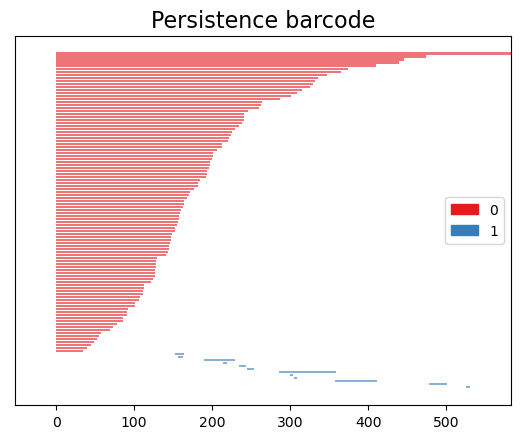

In [19]:
# Crear el complejo simplicial
rips_complex = gudhi.RipsComplex(points=random_sample.values)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular homología persistente
diag = simplex_tree.persistence()

# Graficar el código de barras
gudhi.plot_persistence_barcode(diag)
plt.show()

# Interpretación

En el diagrama, se destacan principalmente dos uno-huecos. Estos podrían estar vinculados a los dos huecos que aparecían al utilizar el algoritmo Mapper, los cuales corresponden a las dos componentes conexas observadas en dicho algoritmo.

Se aprecian otros puntos en H1. Estos podrían estar relacionados con las partes de los extremos de las dos componentes conexas o con la tercera componente conexa, que era bastante pequeña y no parecía tener una relevancia significativa.